In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from keras.models import load_model

from sklearn.metrics import accuracy_score

%matplotlib inline

Using TensorFlow backend.


In [2]:
grid_df = pd.read_pickle('./model_data/grid_{}.pkl'.format('06'))
# grid_df = pd.read_pickle('G:\Il mio Drive\Colab Notebooks\deep_mouse\model_data/grid_{}.pkl'.format('08'))

In [3]:
df_32 = grid_df.loc[grid_df["batch_size"]==32]
histories = iter(df_32.fit_out.reset_index(drop=True))
a = 0

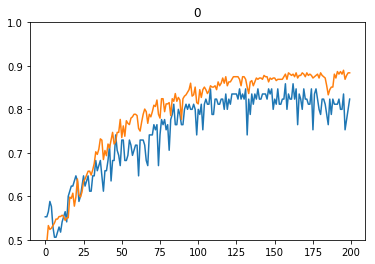

In [4]:
history = next(histories)

y_val = history.history['val_acc']
y_train = history.history['acc']

plt.plot(y_val)
plt.plot(y_train)
plt.ylim(0.5,1)
plt.title(a)
a = a+1

In [84]:
best_bodel_path = grid_df.loc[grid_df["batch_size"]==32].reset_index(drop=True).loc[2]['best_model_path']

In [95]:
best_model = load_model('./models/04/best_model_04_6.pkl')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [16]:
print(*grid_df.columns, sep='\n')

LSTM_size
batch_size
batch_size_data
best_model_accuracy
best_model_metric
best_model_path
epochs
fit_out
index
input_shape
learning_rate
params
seed_model
seed_numpy
seed_random
seed_skf
seed_sklearn
seed_tensorflow
sigma_cut
skf_n_splits
skf_split
test_size
training_metric
version
x_std
y_std


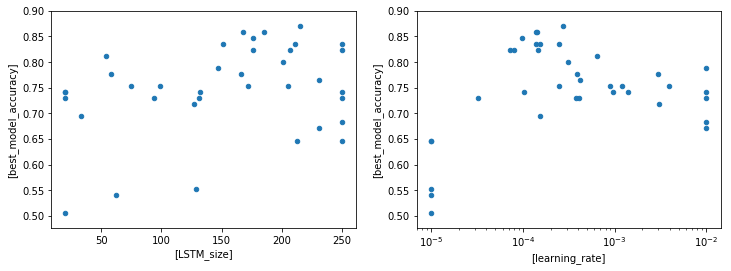

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

grid_df.plot(['LSTM_size'], ['best_model_accuracy'], kind='scatter', ax=ax1)
grid_df.plot(['learning_rate'], ['best_model_accuracy'], kind='scatter', ax=ax2, logx=True)



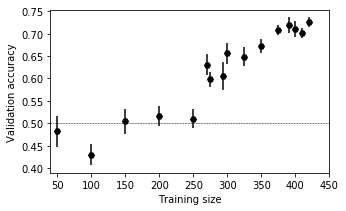

In [35]:
concat_path = './model_data/grid_mix2_{}.pkl'.format('08')
df = pd.read_pickle(concat_path)

fig, ax = plt.subplots(1, figsize=(5, 3))

for fo, ts in zip(df.fit_outs, df.training_size):
    somma = [x.history['val_acc'] for x in fo]
    s = np.mean(somma, 0)[130:180].mean()
    err = np.mean(somma, 0)[130:180].std()
    ax.errorbar(ts, s, err, fmt='H', color='black')
    
ax.hlines(0.5, 0, 550, linestyles='--', linewidth= 0.5)
ax.set_xlim(40, 450)
ax.set(xlabel='Training size', ylabel='Validation accuracy');

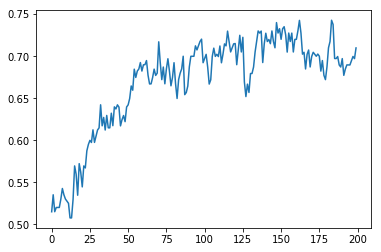

In [57]:
fo = df[df.training_size==400].fit_outs.iloc[0]
somma = [x.history['val_acc'] for x in fo]
plt.plot(np.mean(somma, 0))

0.4823394030332566
0.5168934966947974
0.7111889377925373
0.6557560227408459
0.6720000000459808


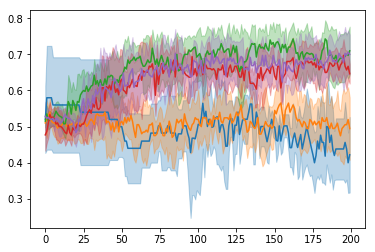

In [31]:
for fo in df.fit_outs[:]:
    somma = [x.history['val_acc'] for x in fo]
    print(np.mean(somma, 0)[130:180].mean())
    line, = plt.plot(np.mean(somma, 0))
    plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
                    color=line.get_color(), alpha=0.3)
    
#     somma = [x.history['acc'] for x in fo]
#     line, = plt.plot(np.mean(somma, 0))
#     plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
#                     color=line.get_color(), alpha=0.3)

## Version 7

In [29]:
VERSION = '07'

local_path = './model_data/grid_{}.pkl'.format(VERSION)
drive_path = 'G:/Il mio Drive/Colab Notebooks/deep_mouse/model_data/grid_{}.pkl'.format(VERSION)


local_df = pd.read_pickle(local_path)
colab_df = pd.read_pickle(drive_path)

print(f'Local: {local_df.shape[0]}, drive: {colab_df.shape[0]}')

concat_path = './model_data/grid_mix_{}.pkl'.format(VERSION)
df = pd.concat([colab_df, local_df], axis=0, ignore_index=True)
df.to_pickle(concat_path)

Local: 3, drive: 12


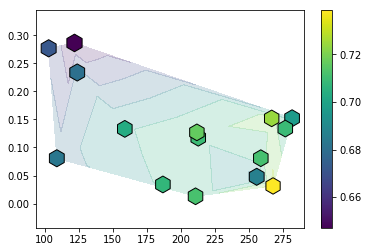

In [30]:
VERSION = '07'

concat_path = './model_data/grid_mix_{}.pkl'.format(VERSION)
combined_df = pd.read_pickle(concat_path)

xyz = np.ones([4, combined_df.shape[0]])

for index, (lstm_size, dropout, fits_outs) in combined_df[['LSTM_size', 'dropout', 'fit_outs']].iterrows():
    somma = [x.history['val_acc'] for x in fits_outs]    
    s = np.mean(somma, 0)[130:].mean()
    sigma = np.mean(somma, 0)[130:].std()

    xyz[0, index] = lstm_size
    xyz[1, index] = dropout
    xyz[2, index] = s
    xyz[3, index] = sigma


scatterplot = plt.scatter(xyz[0,:], xyz[1,:], c=xyz[2,:], s=1/(xyz[2,:])*2e2, zorder=10, marker='h', edgecolors='black')
plt.tricontourf(xyz[0,:], xyz[1,:], xyz[2,:], alpha=0.2, zorder=3)
plt.colorbar(scatterplot)

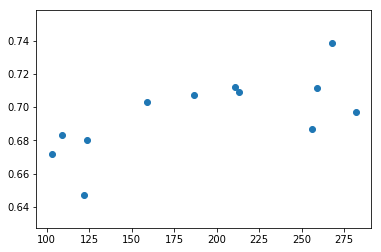

In [15]:
plt.scatter(xyz[0,:], xyz[2,:])

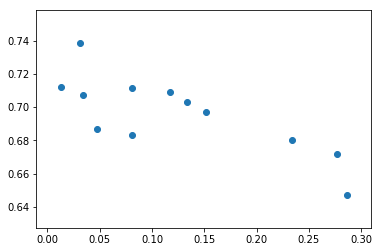

In [17]:
plt.scatter(xyz[1,:], xyz[2,:])

## Version 9

In [35]:
VERSION = '09'

local_path = './model_data/grid_{}.pkl'.format(VERSION)
drive_path = 'G:/Il mio Drive/Colab Notebooks/deep_mouse/model_data/grid_{}.pkl'.format(VERSION)


#local_df = pd.read_pickle(local_path)
colab_df = pd.read_pickle(drive_path)

#print(f'Local: {local_df.shape[0]}, drive: {colab_df.shape[0]}')

#concat_path = './model_data/grid_mix_{}.pkl'.format(VERSION)
#df = pd.concat([colab_df, local_df], axis=0, ignore_index=True)
#df.to_pickle(concat_path)
df = colab_df

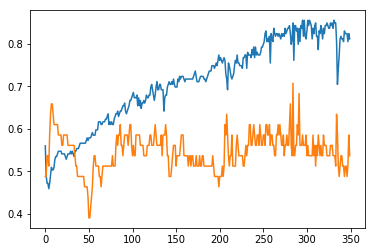

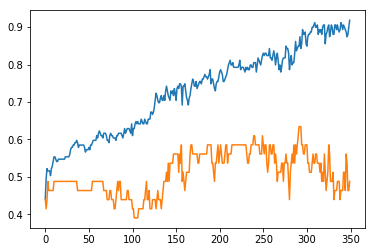

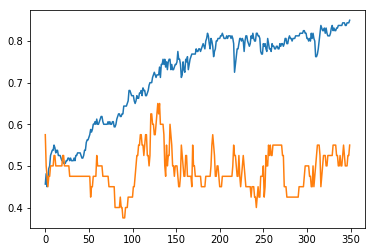

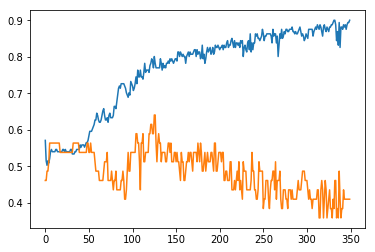

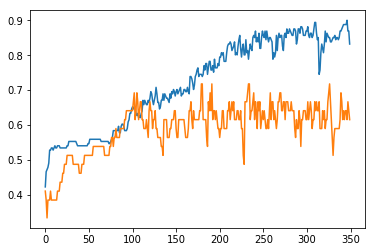

In [36]:
for i in range(5):
    acc = df.loc[0]['fit_outs'][i].history['acc']
    
    plt.plot(acc)
    plt.plot(df.loc[0]['fit_outs'][i].history['val_acc']
)
    plt.show()
    

0.5410266522169114
0.5668446556462281
0.540842318004056
0.7369991747356167
0.7212133326634489
0.5746099739643726


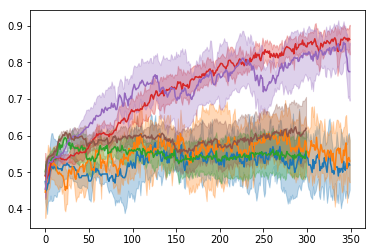

In [37]:
for fo in df.fit_outs[:]:
    somma = [x.history['val_acc'] for x in fo]
    print(np.mean(somma, 0)[130:180].mean())
    line, = plt.plot(np.mean(somma, 0))
    plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
                    color=line.get_color(), alpha=0.3)
    
#     somma = [x.history['acc'] for x in fo]
#     line, = plt.plot(np.mean(somma, 0))
#     plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
#                     color=line.get_color(), alpha=0.3)
for fo in df.fit_outs[:]:
    somma = [x.history['acc'] for x in fo]
    print(np.mean(somma, 0)[130:180].mean())
    line, = plt.plot(np.mean(somma, 0))
    plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
                    color=line.get_color(), alpha=0.3)
    
#     somma = [x.history['acc'] for x in fo]
#     line, = plt.plot(np.mean(somma, 0))
#     plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
#                     color=line.get_color(), alpha=0.3)

0.7369991747356167
0.7212133326634489
0.5746099739643726


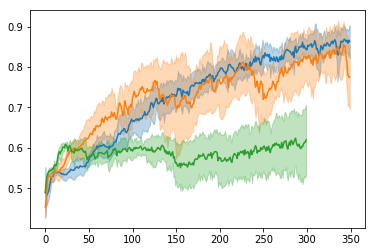

In [43]:
for fo in df.fit_outs[:]:
    somma = [x.history['acc'] for x in fo]
    print(np.mean(somma, 0)[130:180].mean())
    line, = plt.plot(np.mean(somma, 0))
    plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
                    color=line.get_color(), alpha=0.3)
    
#     somma = [x.history['acc'] for x in fo]
#     line, = plt.plot(np.mean(somma, 0))
#     plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
#                     color=line.get_color(), alpha=0.3)
# for fo in df.fit_outs[:]:
#     somma = [x.history['loss'] for x in fo]
#     print(np.mean(somma, 0)[130:180].mean())
#     line, = plt.plot(np.mean(somma, 0))
#     plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
#                     color=line.get_color(), alpha=0.3)
    
#     somma = [x.history['acc'] for x in fo]
#     line, = plt.plot(np.mean(somma, 0))
#     plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
#                     color=line.get_color(), alpha=0.3)

In [39]:
colab_df

,LSTM_size,batch_size,batch_size_data,best_model_accuracies,best_model_metric,best_model_paths,dropout,epochs,fit_outs,input_shape,...,sigma_cut,skf_n_splits,test_index,test_size,training_metric,training_size,version,x_std,y_std,kernel_regularizer
0,200.0,128.0,200.0,"[0.707317054271698, 0.6341463327407837, 0.6499...",val_acc,"[../models/09/best_model_0_0.pkl, ../models/09...",0.0,350.0,[<keras.callbacks.History object at 0x00000156...,"(199, 2)",...,0.1,5.0,0.0,0.15,accuracy,200.0,09,6.464,5.085,NaN
1,200.0,32.0,200.0,"[0.6829268350833799, 0.6829268336296082, 0.625...",val_acc,"[../models/09/best_model_0_0.pkl, ../models/09...",0.0,350.0,[<keras.callbacks.History object at 0x00000156...,"(199, 2)",...,0.1,5.0,0.0,0.15,accuracy,200.0,09,6.464,5.085,NaN
2,200.0,128.0,200.0,"[0.6069518649641843, 0.6684491953110312, 0.584...",val_acc,"[../models/09/best_model_1.0_0.pkl, ../models/...",0.0,300.0,[<keras.callbacks.History object at 0x00000156...,"(199, 2)",...,0.1,5.0,1.0,0.15,accuracy,700.0,09,6.464,5.085,0.01


In [40]:
colab_df

,LSTM_size,batch_size,batch_size_data,best_model_accuracies,best_model_metric,best_model_paths,dropout,epochs,fit_outs,input_shape,...,sigma_cut,skf_n_splits,test_index,test_size,training_metric,training_size,version,x_std,y_std,kernel_regularizer
0,200.0,128.0,200.0,"[0.707317054271698, 0.6341463327407837, 0.6499...",val_acc,"[../models/09/best_model_0_0.pkl, ../models/09...",0.0,350.0,[<keras.callbacks.History object at 0x00000156...,"(199, 2)",...,0.1,5.0,0.0,0.15,accuracy,200.0,09,6.464,5.085,NaN
1,200.0,32.0,200.0,"[0.6829268350833799, 0.6829268336296082, 0.625...",val_acc,"[../models/09/best_model_0_0.pkl, ../models/09...",0.0,350.0,[<keras.callbacks.History object at 0x00000156...,"(199, 2)",...,0.1,5.0,0.0,0.15,accuracy,200.0,09,6.464,5.085,NaN
2,200.0,128.0,200.0,"[0.6069518649641843, 0.6684491953110312, 0.584...",val_acc,"[../models/09/best_model_1.0_0.pkl, ../models/...",0.0,300.0,[<keras.callbacks.History object at 0x00000156...,"(199, 2)",...,0.1,5.0,1.0,0.15,accuracy,700.0,09,6.464,5.085,0.01


In [54]:
colab_df = pd.read_pickle(drive_path)
colab_df

,LSTM_size,batch_size,batch_size_data,best_model_accuracies,best_model_metric,best_model_paths,dropout,epochs,fit_outs,input_shape,...,sigma_cut,skf_n_splits,test_index,test_size,training_metric,training_size,version,x_std,y_std,kernel_regularizer
0,200.0,128.0,200.0,"[0.707317054271698, 0.6341463327407837, 0.6499...",val_acc,"[../models/09/best_model_0_0.pkl, ../models/09...",0.0,350.0,[<keras.callbacks.History object at 0x00000156...,"(199, 2)",...,0.1,5.0,0.0,0.15,accuracy,200.0,09,6.464,5.085,NaN
1,200.0,32.0,200.0,"[0.6829268350833799, 0.6829268336296082, 0.625...",val_acc,"[../models/09/best_model_0_0.pkl, ../models/09...",0.0,350.0,[<keras.callbacks.History object at 0x00000156...,"(199, 2)",...,0.1,5.0,0.0,0.15,accuracy,200.0,09,6.464,5.085,NaN
2,200.0,128.0,200.0,"[0.6069518649641843, 0.6684491953110312, 0.584...",val_acc,"[../models/09/best_model_1.0_0.pkl, ../models/...",0.0,300.0,[<keras.callbacks.History object at 0x00000156...,"(199, 2)",...,0.1,5.0,1.0,0.15,accuracy,700.0,09,6.464,5.085,0.01
3,100.0,128.0,200.0,[0.6417112309027483],val_acc,[../models/09/best_model_2.0_0.pkl],0.0,200.0,[<keras.callbacks.History object at 0x00000156...,"(199, 2)",...,0.1,5.0,2.0,0.15,accuracy,800.0,09,6.464,5.085,NaN
4,250.0,128.0,200.0,[0.566844920423579],val_acc,[../models/09/best_model_3.0_0.pkl],0.0,200.0,[<keras.callbacks.History object at 0x00000156...,"(199, 2)",...,0.1,5.0,3.0,0.15,accuracy,450.0,09,6.464,5.085,NaN


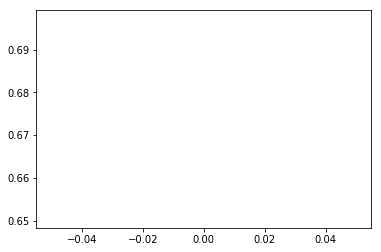

In [56]:
plt.plot(colab_df.iloc[-1].fit_outs[-1].history['val_loss'])
plt.plot(colab_df.iloc[-1].fit_outs[-1].history['loss'])

In [60]:
colab_df.iloc[-1].fit_outs[0].history

{'val_loss': [0.6969062539345441],
 'val_acc': [0.566844920423579],
 'loss': [0.6506155380934238],
 'acc': [0.6005361944676724]}

## ver 10

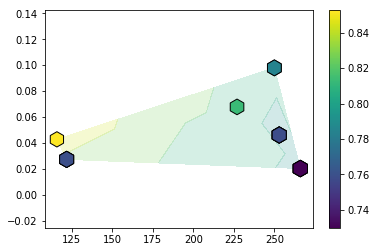

In [63]:
VERSION = '10'

concat_path = './model_data/grid_{}.pkl'.format(VERSION)
combined_df = pd.read_pickle(concat_path)

xyz = np.ones([4, combined_df.shape[0]])

for index, (lstm_size, dropout, fits_outs) in combined_df[['GRU_size', 'dropout', 'fit_outs']].iterrows():
    somma = [x.history['val_acc'] for x in fits_outs]    
    s = np.mean(somma, 0)[130:].mean()
    sigma = np.mean(somma, 0)[130:].std()

    xyz[0, index] = lstm_size
    xyz[1, index] = dropout
    xyz[2, index] = s
    xyz[3, index] = sigma


scatterplot = plt.scatter(xyz[0,:], xyz[1,:], c=xyz[2,:], s=1/(xyz[2,:])*2e2, zorder=10, marker='h', edgecolors='black')
plt.tricontourf(xyz[0,:], xyz[1,:], xyz[2,:], alpha=0.2, zorder=3)
plt.colorbar(scatterplot)